In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import seaborn as sns

### 分析宜蘭縣政府財政稅務局107年視訊服務件數

In [12]:
df =pd.read_csv('http://opendataap2.e-land.gov.tw/resource/files/2019-11-13/4793347309e289efee8bdfb9016f754d.csv')

In [13]:
len(df)

12

In [14]:
df

,月份,宜蘭市公所,頭城鎮公所,壯圍鄉公所,員山鄉公所,羅東鎮公所,五結鄉公所,冬山鄉公所,三星鄉公所,大同鄉公所,蘇澳鎮公所,南澳鄉公所,國有財產局,國稅宜蘭分局,合計
0,1月,0,145,1,0,0,13,15,19,236,72,103,0,0,604
1,2月,0,79,4,1,0,3,5,2,161,44,113,0,0,412
2,3月,4,332,20,3,0,23,23,50,143,135,63,0,0,796
3,4月,0,114,9,0,1,6,5,7,99,80,35,0,0,356
4,5月,0,152,26,1,0,8,15,12,105,67,63,5,0,454
5,6月,0,104,2,0,0,38,8,2,96,75,60,0,0,385
6,7月,0,67,18,0,0,9,7,10,39,104,95,4,0,353
7,8月,0,115,18,0,0,13,17,11,60,94,94,5,0,427
8,9月,0,167,13,0,0,14,5,60,93,99,99,2,0,552
9,10月,0,155,6,0,0,7,17,8,176,106,141,4,0,620


### 刪除指定數據

In [15]:
df=df.drop("國稅宜蘭分局",axis=1)

In [16]:
df.head()

,月份,宜蘭市公所,頭城鎮公所,壯圍鄉公所,員山鄉公所,羅東鎮公所,五結鄉公所,冬山鄉公所,三星鄉公所,大同鄉公所,蘇澳鎮公所,南澳鄉公所,國有財產局,合計
0,1月,0,145,1,0,0,13,15,19,236,72,103,0,604
1,2月,0,79,4,1,0,3,5,2,161,44,113,0,412
2,3月,4,332,20,3,0,23,23,50,143,135,63,0,796
3,4月,0,114,9,0,1,6,5,7,99,80,35,0,356
4,5月,0,152,26,1,0,8,15,12,105,67,63,5,454


### 大同鄉公所視訊服務件數最多的月份

In [21]:
df[df['大同鄉公所']==df['大同鄉公所'].max()]

,月份,宜蘭市公所,頭城鎮公所,壯圍鄉公所,員山鄉公所,羅東鎮公所,五結鄉公所,冬山鄉公所,三星鄉公所,大同鄉公所,蘇澳鎮公所,南澳鄉公所,國有財產局,合計
0,1月,0,145,1,0,0,13,15,19,236,72,103,0,604


### 大同鄉公所視訊服務件數最少的月份¶

In [22]:
df[df['大同鄉公所']==df['大同鄉公所'].min()]

,月份,宜蘭市公所,頭城鎮公所,壯圍鄉公所,員山鄉公所,羅東鎮公所,五結鄉公所,冬山鄉公所,三星鄉公所,大同鄉公所,蘇澳鎮公所,南澳鄉公所,國有財產局,合計
10,11月,0,114,2,0,1,3,14,3,18,71,20,2,248


### 蘇澳鎮公所視訊服務件數最少的五個月份

In [23]:
df_sorted=df.sort_values(by=["蘇澳鎮公所"],ascending=False)

In [25]:
df.tail()

,月份,宜蘭市公所,頭城鎮公所,壯圍鄉公所,員山鄉公所,羅東鎮公所,五結鄉公所,冬山鄉公所,三星鄉公所,大同鄉公所,蘇澳鎮公所,南澳鄉公所,國有財產局,合計
7,8月,0,115,18,0,0,13,17,11,60,94,94,5,427
8,9月,0,167,13,0,0,14,5,60,93,99,99,2,552
9,10月,0,155,6,0,0,7,17,8,176,106,141,4,620
10,11月,0,114,2,0,1,3,14,3,18,71,20,2,248
11,12月,0,73,3,0,0,12,13,7,99,84,94,2,387


### 資料繪圖

(<matplotlib.axes._subplots.AxesSubplot at 0x1a25e304a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a25e304a8>)

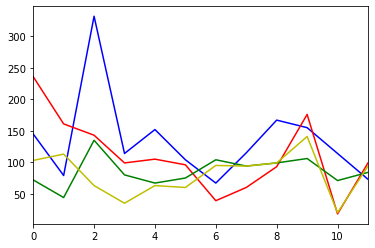

In [17]:
df.頭城鎮公所.plot(color='b'),df.大同鄉公所.plot(color='r'),df.蘇澳鎮公所.plot(color='g'),df.南澳鄉公所.plot(color='y')